# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 2: Naive Bayes Classifier ##

In this lab exercise you will build a **a simple method that helps us predict if a mushroom is poisonous or not based on certain characteristics like odor, color, and shape** using Naive Bayes and apply it to an *augmented* version of the [classic UCI mushroom](https://archive.ics.uci.edu/dataset/73/mushroom) dataset. Please follow the guided steps and your task is to complete the key pieces of code.



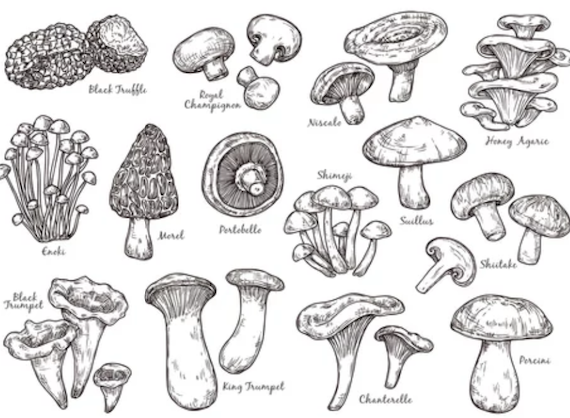

## Overview

We will proceed in four steps.

**Task 0 - Load the data** into memory.

**Task 1 - Class priors**  
   Derive $\hat P(y=c)$ with Laplace smoothing. Throughout the lab we adopt *add-one* (Laplace) smoothing so that every estimated likelihood or chance is strictly positive.

**Task 2 - Feature likelihoods**  
   Derive $\hat P(x_j=m \mid y=c)$ for every characteristic or property $j$ and category $m$.

**Task 3 - Prediction & evaluation**  
   Combine priors and likelihoods in log-space, make predictions on a test set and compute the accuracy.

**Finally - Do prediction and accuracy score**

  Check your implementations by doing predictions with your model and check the accuracy scode.


## Task 0 — Load the data (Not Evaluated)

### 0.1 Upload CSV

Download and upload a copy of the dataset (X_train, y_train, X_test, y_test) to Colab.

You can do this by simply dragging and dropping the files to the left sidebar.

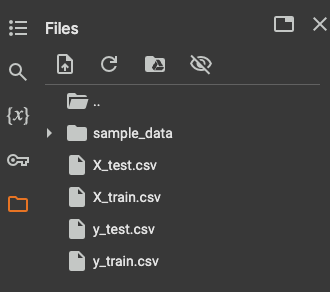

If you have successfully uploaded the dataset, you should see X_test.csv, X_train.csv, y_test.csv, y_train.csv in the output from the code below.

In [ ]:
%ls

### 0.2 Load Dataset



The table below provides an overview of the augmented [mushroom dataset](https://archive.ics.uci.edu/dataset/73/mushroom) we'll use for predictions. This dataset describes samples from 23 species of gilled mushrooms in the Agaricus and Lepiota families.

All categorical features have been converted into **integer codes**, and each species is labeled as either edible or poisonous. The mapping tables are included for your reference.

| Feature | Integer → Meaning |
|---------|-------------------|
| **odor** | 0 = anise, 1 = musty, 2 = almond, 3 = none, 4 = foul, 5 = fishy, 6 = creosote, 7 = pungent, 8 = spicy |
| **spore\_print\_color** | 0 = yellow, 1 = black, 2 = white, 3 = purple, 4 = chocolate, 5 = green, 6 = buff, 7 = orange, 8 = brown |
| **population** | 0 = clustered, 1 = scattered, 2 = solitary, 3 = abundant, 4 = numerous, 5 = several |
| **gill\_size** | 0 = broad, 1 = narrow |
| **is\_bruises** | 0 = no bruises, 1 = bruises |
| **ring\_number** | 0 = none, 1 = two, 2 = one |
| **stalk\_surface\_below\_ring** | 0 = fibrous, 1 = scaly, 2 = smooth, 3 = silky |
| **stalk\_shape** | 0 = enlarging, 1 = tapering |

The class label (`label`) is **0 = edible, 1 = poisonous**.


In [ ]:
# ----------------------------
# Task 0 – Load the dataset
# ----------------------------

import numpy as np
import pandas as pd
from typing import List

if __name__ == '__main__':
    # Load data
    X_train = pd.read_csv('X_train.csv')
    X_test = pd.read_csv('X_test.csv')
    y_train = pd.read_csv('y_train.csv')
    y_test = pd.read_csv('y_test.csv')

    print(f"X_train columns: {[_ for _ in X_train.columns]}")
    print(f"y_train columns: {[_ for _ in y_train.columns]}")
    print(f"X_train Rows: {X_train.shape[0]} Columns: {X_train.shape[1]}")
    print(f"X_test Rows: {X_test.shape[0]} Columns: {X_test.shape[1]}")
    print(f"y_train Rows: {y_train.shape[0]} Columns: {y_train.shape[1]}")
    print(f"y_test Rows: {y_test.shape[0]} Columns: {y_test.shape[1]}")

    X_train = np.array(X_train, dtype=np.int16)
    X_test = np.array(X_test, dtype=np.int16)
    y_train = np.array(y_train, dtype=np.int16).flatten()
    y_test = np.array(y_test, dtype=np.int16).flatten()

## Task 1 — Calculate priors

Implement `calculate_priors(y)` so that it returns a NumPy array of shape `(num_classes,)` containing the **smoothed empirical prior** for each class.

**Prior Formula**
$$
P(\text{class}=c)
= \frac{\text{count}(\text{class}=c) + 1}
       {\text{total samples} + \text{num of classes}}
$$

**Laplace Smoothing**: We add 1 to avoid zero probabilities.

**Steps**

1. Let `num_classes = max(y) + 1`.  
2. Build a one-hot indicator matrix by comparing `y` to `np.arange(num_classes)`.  
3. Sum over samples to get counts per class.  
4. Apply add-one smoothing and return a 1-D array of length `num_classes`.  

In [ ]:
# ----------------------------
# Task 1 — Calculate priors
# ----------------------------

def calculate_priors(y: np.ndarray) -> np.ndarray:
    """Compute Laplace‑smoothed class priors.

    Parameters
    ----------
    y : np.ndarray, shape (num_samples,)
        Integer class labels.



    One-Hot Indicator Matrix Example:

                        after some numpy operations
    [0, 2, 5, 3, 1, 1] ------------------------------>

    class:    0      1      2     3       4     5
          [[True, False, False, False, False, False],
           [False, False, True, False, False, False],
           [False, False, False, False, False, True],
           [False, False, False, True, False, False],
           [False, True, False, False, False, False],
           [False, True, False, False, False, False]]

    To read more on one-hot encoding, visit https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/

    Return
    -------
    np.ndarray, shape (num_classes,)
        Smoothed prior probability for each class, summing to 1.
    """

    #####################################################################
    # TODO: your code starts here




    # TODO: your code ends here
    #####################################################################

    return smoothed_priors


# Tiny self‑check
if __name__ == '__main__':
    y_test = np.array([0, 1, 0, 1, 1])
    priors = calculate_priors(y_test)
    print('Class priors:', priors)

## Task 2 — Calculate likelihoods

Implement `calculate_likelihoods(X, y)` so that it returns a **list** whose *j*-th element is a 2-D array of shape `(K_j, num_classes)` with smoothed estimates of

$$
\hat P\bigl(x_j = m \mid y = c\bigr)
$$

for every characteristic or feature `j` and category `m`.

In other words, each matrix of shape `(K_j, num_classes)` represents the matrix of likelihoods of a single feature of the dataset. For a certian feature j, each entry `(m,c)` of a single matrix represents the likelihood of the $m^{th}$ category of feature j for the class b (which is whether the mushroom is poisonous in this context). The likelihood formula below is the value you should compute for each entry `(m,c)` of feature j.

**Likelihood Formula**

$$
P(\text{feature}_j = m \mid \text{class} = c) = \frac{\text{count}(\text{feature}_j = m, \text{class} = c) + 1}{\text{count in class } c + \text{categories in feature}_j}
$$

**Laplace Smoothing**: We add 1 to the count of samples in each class to avoid zero probabilities.

**Steps**

1. Compute `num_classes` and the number of categories `num_cat` for each characteristic or feature (the maximum value plus 1).  
2. For every characteristic or feature `j`:  
   a. Build an `(num_samples, num_cat)` indicator matrix for that characteristic or feature.  
   b. Compute the class-conditional counts via matrix multiplication with the one-hot class indicators from Task 1.  
   c. Apply Laplace smoothing **independently for each class**.  
3. Append each characteristic or property's likelihood matrix to a list and return the list.

In [ ]:
# ---------------------------------
# Task 2 — Calculate Likelihoods
# ---------------------------------

def calculate_likelihoods(X: np.ndarray, y: np.ndarray):

    """Compute Laplace‑smoothed feature likelihoods.

    Parameters
    ----------
    X : np.ndarray, shape (num_samples, num_features)
        Categorical features encoded as non‑negative integers.
    y : np.ndarray, shape (num_samples,)
        Class labels.

    Hints for finding the count(feature_j=m, class=c):
    There are 2 one-hot matrices you need to solve this task. The first one is
    class_index built for you with dimensions (num_samples, num_classes).
            class:  0  1  2
    class_index = [[0, 1, 0,]
                   [1, 0, 0]
                   [0, 0, 1]
                   [1, 0, 0]
                   [0, 0, 1]]

    The second one is with dimensions (num_samples, num_cat). Where num_cat is
    the number of categories in a feature. (e.g. Gill size: 0(broad), 1(narrow))
         category:  0  1  2
    class_index = [[0, 1, 0,]
                   [1, 0, 0]
                   [0, 0, 1]
                   [1, 0, 0]
                   [0, 0, 1]]

    More hints: look at each of these matrices as vertical vectors. Each vertical vector
    has a 1 in each row if and only if the corresponding sample is in that class/category.
    What should you do if you want to choose elements of both category m and class c?

    Return
    -------
    list of np.ndarray
        The j‑th element has shape (num_cat, num_classes) and contains
        P(x_j = m | y = c) for all category indices m and classes c.
    """

    likelihoods = []

    num_samples, num_features = X.shape
    num_classes = int(np.max(y)) + 1

    # One‑hot encoding for classes: shape (num_samples, num_classes)
    class_index = (y[:, None] == np.arange(num_classes)).astype(int)

    for j in range(num_features):

        #####################################################################
        # TODO: your code starts here




        # TODO: your code ends here
        #####################################################################

        likelihoods.append(smooth_arr)

    return likelihoods

# Tiny self‑check
if __name__ == '__main__':
    X_test = np.array([[0, 1],
                       [1, 0],
                       [0, 1],
                       [1, 0]])
    y_test = np.array([0, 1, 0, 1])
    likelihoods = calculate_likelihoods(X_test, y_test)
    print('Feature 0 likelihoods:\n', likelihoods[0])
    print('Feature 1 likelihoods:\n', likelihoods[1])


## Task 3 — Calculate posteriors Score

Implement `calculate_posteriors(X, class_priors, likelihoods)` to compute a score for each sample and class. The class with the highest score will be our prediction.

**Prediction using Bayes' Theorem**

The full formula for the posterior probability is:
$$P(\text{class} = c | X) = \frac{P(\text{class} = c) \cdot \prod_{j=1}^{n} P(\text{feature}_j = x_j | \text{class} = c)}{P(\text{features})}$$
**Key Insight:** For a given sample $X$, the denominator $P(\text{features})$ is a constant across all classes. Since our goal is simply to find the class $c$ that *maximizes* the posterior probability, we can ignore this constant denominator. The task is simplified to finding the class that maximizes the numerator.Therefore, our decision rule is:

$$\text{Predicted Class} = \mathop{argmax}\limits_{c} \left( P(\text{class} = c) \cdot \prod_{j=1}^{n} P(\text{feature}_j = x_j | \text{class} = c) \right)$$

**Prediction Algorithm (in Log-Space)**
Multiplying many small probabilities can lead to numerical underflow (the result becomes too close to zero). A common and robust practice is to work with log-probabilities instead. This transforms the product into a sum, which is numerically more stable and computationally efficient.

For each sample:
1. For each class `c`, start with its log-prior: `log P(y=c)`.
2. For every feature `j` in the sample, add the corresponding log-likelihood: `log P(x_j | y=c)`.
3. The final sum for each class is a score proportional to its log-posterior probability.
4. Choose the class with the **highest** total score as the prediction.

*Hint:* You don't need to repeat a 1D array into every row by hand. For example, try broadcasting in Python, such as adding your 1D vector to a zero array of the desired shape.

In [ ]:
# ----------------------------------
# Task 3 — Calculate posteriors
# ----------------------------------

def calculate_posteriors(X: np.ndarray, class_priors: np.ndarray, likelihoods: List[np.ndarray]) -> np.ndarray:

    """Compute posterior probabilities for each class.

    Parameters
    ----------
    X : np.ndarray, shape (num_samples, num_features)
        Feature matrix.
    class_priors : np.ndarray, shape (num_classes,)
        Prior probabilities for each class.
    likelihoods : List[np.ndarray]
        Likelihood tables as returned by `calculate_likelihoods`.

    Hint for calculating the numerator of posterior probability:
    What you have to do is very similar to what you have done in task 2.
    Try to draw out the matrices yourself that is relevant for calculation:

    The first matrix you will need is the likelihoods matrix of dimensions (num_samples, num_classes).
    The second matrix would be something that helps you choose the correct categories for each feature.

    Below are some hints to help you imagine how you can construct this matrix:
    For a certain sample, how would you construct a 1D vector to choose from
    the likelihood matrix such that you get the correct category for all classes?
    How can you expand this idea to all samples so that we only need to use for loop once?
    How can you construct this matrix using broadcasting?

    Return
    -------
    np.ndarray, shape (num_samples, num_classes)
        Posterior probabilities for each sample and class.
    """

    num_samples, num_features = X.shape
    num_classes = class_priors.shape[0]

    # Log‑priors: shape (1, num_classes)
    log_priors = np.log(class_priors)[None, :]

    # Initialize log‑posterior accumulator: shape (num_samples, num_classes)
    log_posteriors = np.zeros((num_samples, num_classes))
    log_posteriors += log_priors  # broadcast to each sample


    # Add log‑likelihoods for each feature
    for j in range(num_features):

        #####################################################################
        # TODO: your code starts here



        # TODO: your code ends here
        #####################################################################

    # Convert log‑posteriors to probabilities
    stabilized = log_posteriors - log_posteriors.max(axis=1, keepdims=True)
    exp_vals = np.exp(stabilized)
    posteriors = exp_vals / exp_vals.sum(axis=1, keepdims=True)

    return posteriors


# Tiny self-check
if __name__ == '__main__':
    posteriors = calculate_posteriors(X_test, calculate_priors(y_train), calculate_likelihoods(X_train, y_train))
    print('Posterior probabilities for the first 5 test samples:\n', posteriors[:5])


## Prediction and accuracy score

Here are two helper functions:

* `predict_nb(X, class_priors, likelihoods)`  
  Return the predicted class label for every row in `X`.
* `accuracy_score(y_true, y_pred)`  
  Compute the fraction of correct predictions.


In [ ]:
def predict_naive_bayes(X: np.ndarray, class_priors: np.ndarray, likelihoods: List[np.ndarray]) -> np.ndarray:
    """Predict class labels for each sample using Naive Bayes."""
    posteriors = calculate_posteriors(X, class_priors, likelihoods)
    return np.argmax(posteriors, axis=1)


def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Compute the fraction of correct predictions."""
    num_correct = np.sum(y_true == y_pred)
    num_samples = y_true.shape[0]
    return num_correct / num_samples


# Tiny self‑check
if __name__ == '__main__':
    X_train_df = pd.read_csv('X_train.csv')
    X_test_df = pd.read_csv('X_test.csv')
    y_train_df = pd.read_csv('y_train.csv')
    y_test_df = pd.read_csv('y_test.csv')

    X_train = np.array(X_train_df, dtype=np.int16)
    X_test = np.array(X_test_df, dtype=np.int16)
    y_train = np.array(y_train_df, dtype=np.int16).flatten()
    y_test = np.array(y_test_df, dtype=np.int16).flatten()

    # --- train on train set ---
    priors      = calculate_priors(y_train)
    likelihoods = calculate_likelihoods(X_train, y_train)

    # --- evaluate on train set (optional check) ---
    train_preds = predict_naive_bayes(X_train, priors, likelihoods)
    train_acc   = accuracy_score(y_train, train_preds)
    print(f'[Train] Predictions: {train_preds[:10]}…')
    print(f'[Train] Accuracy:    {train_acc:.4f}')

    # --- evaluate on test set (what you really care about) ---
    test_preds = predict_naive_bayes(X_test, priors, likelihoods)
    test_acc   = accuracy_score(y_test, test_preds)
    print(f'[Test]  Predictions: {test_preds[:10]}…')
    print(f'[Test]  Accuracy:    {test_acc:.4f}')

## Submission and Grading

### **ZINC Submission**
- **Deadline:**  **Monday, 8 October 2025, 23:59**

- You may earn **10 points** for each lab via Automated Grading on the [ZINC Online Submission System](https://zinc.cse.ust.hk/).

- Submit a zip file containing only `lab2_task.py` to ZINC. You can create your zip file by following these steps:
  - Comment out any additional script you may have included for debugging purposes.
  - Click `File` → `Download` → `Download .py`.
  - Make sure the name of the `.py` file is `lab2_task.py`, as this is necessary for ZINC to check your work.
  - Compress the `.py` file to a zip file. The name of the zip file does not matter.
  - Submit the zip file to [ZINC](https://zinc.cse.ust.hk). ZINC usage instructions can be found [here](https://zinc.cse.ust.hk/guide).

- You can submit your codes **up to 50 times** to ZINC before the deadline.  
  Each time you submit your zip file, ZINC will give feedback on the correctness of your tasks via real-time grading.  
  However, **only the last submission** will be graded (not the one with the highest score).

### **Grading scheme**
* You get **3 points** for the correct implementation of prior calculation.
* You get **3 points** for the correct implementation of likelihood calculation.
* You get **4 points** for the correct implementation of posterior calculation.

**Note:**
1. Modifications outside function implementation of `calculate_priors`, `calculate_likelihoods` and `calculate_posteriors` may **not** be taken into consideration during grading. Please make sure to include your own test only in the `if __name__ == '__main__'` parts, as modifications in other parts might cause ZINC cannot identify your solution correctly.

2. In ZINC, some functions `numpy.some_func(arr, ...)` are not the same as `arr.some_func(...)`. This will be fixed in future versions of ZINC. However, in the meantime, please use `numpy.some_func(arr, ...)`.
